<a href="https://colab.research.google.com/github/RichardKameri/Machine-learning-2/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --pip upgrade pip



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --pip


In [2]:
! pip install tensorflow


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

%matplotlib inline



In [4]:
# import data
df = pd.read_csv('/content/housing_price_dataset.csv')

In [5]:
# display the data frame
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


<ipython-input-6-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

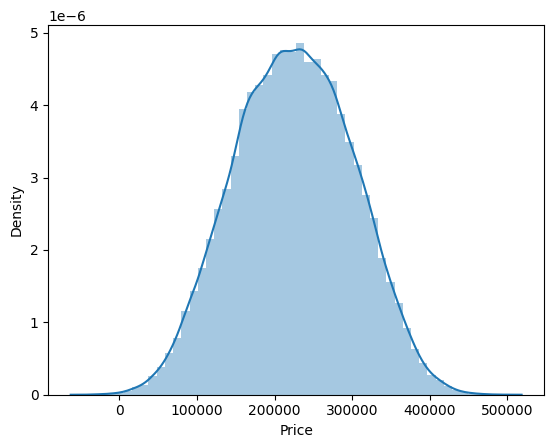

In [6]:
sns.distplot(df['Price'])

In [7]:
# check for missing data
df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


DATA NORMALIZATION


In [8]:
#Data is normalized by subtracting each value in the column with the mean value and then dividing it with the standard deviation of the whole column
# Select only numeric features for normalization
numeric_features = df.select_dtypes(include=['number'])
# Normalize numeric features
df[numeric_features.columns] = (numeric_features - numeric_features.mean()) / numeric_features.std()
# %%
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.207859,0.449062,-1.220101,Rural,-0.791743,-0.124400
1,0.786472,-0.446733,0.005614,Rural,-0.260839,-0.391547
2,-0.254338,-1.342529,-1.220101,Suburb,-0.743479,1.077774
3,0.499772,-1.342529,-1.220101,Urban,0.511385,-0.236933
4,0.214809,1.344858,0.005614,Suburb,0.752705,0.625266


In [9]:
y_mean = df['Price'].mean()
y_std = df['Price'].std()

In [10]:
 #Defining a function which will convert the label values back to the original distribution and return it
def convert_label_value(pred):
    return int(pred * y_std + y_mean)

CREATING TRAINING AND TEST SETS


In [11]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X = df.iloc[:, :6] #Storing the features in 'X'
X.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.207859,0.449062,-1.220101,Rural,-0.791743,-0.124400
1,0.786472,-0.446733,0.005614,Rural,-0.260839,-0.391547
2,-0.254338,-1.342529,-1.220101,Suburb,-0.743479,1.077774
3,0.499772,-1.342529,-1.220101,Urban,0.511385,-0.236933
4,0.214809,1.344858,0.005614,Suburb,0.752705,0.625266


In [12]:
# storring the features in Y
y = df.iloc[:, -1]
y.head()

,Price
0,-0.124400
1,-0.391547
2,1.077774
3,-0.236933
4,0.625266


In [13]:
X_arr = X.values
Y_arr = y.values

print('X_arr shape: ', X_arr.shape) #'shape' gives the dimension of the entity
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (50000, 6)
Y_arr shape:  (50000,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)
#This predefined function splits the dataset to train and test set, where test size is given in 'test_size'(Here 5%)
#Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits.

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (47500, 6)
y_train shape:  (47500,)
X_test shape:  (2500, 6)
y_test shape:  (2500,)


In [22]:
!pip install tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

def get_model():

    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'), #10 neurons, Input Layer
        Dense(20, activation = 'relu'),                     #20 neurons, Hidden Layer
        Dense(5, activation = 'relu'),                      #5  neurons, Hidden Layer
        Dense(1)                                            #Output Layer
    ])                                                      #'relu' activation

    model.compile(
        loss='mse',                                         #Trained using Mean square error loss (Cost function)
        optimizer='adam'                                    #Optimizer used is 'adam' (One of the Fastest optimizers)
    )

    return model

model = get_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)